## Midterm project: Equity Portfolio Management

### Data Preparation

Download the historial daily data of the entire 2018 for the 10 stocks 

```python
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP']
```

For example, to download IBM data, use the following link to go to yahoo finance page. Find the "Download Data" link to download the csv file to you local disk.
https://finance.yahoo.com/quote/IBM/history?period1=1514782800&period2=1546232400&interval=1d&filter=history&frequency=1d

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 9 stocks.

You should have 10 csv files on your disk now. IBM.csv, MSFT.csv, etc. We call the 10 stocks "universe" which is the entire stock market you can trade.


### Retrieve the "Close" and "Adj Close" values for each stock

You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

### You start to manage 5 million dollars fund on Jan 02, 2018



In [121]:
library(dplyr)

IBM= read.csv("IBM.csv", header=TRUE,row.names="Date")
MSFT= read.csv("MSFT.csv", header=TRUE,row.names="Date")
GOOG= read.csv("GOOG.csv", header=TRUE,row.names="Date")
AAPL= read.csv("AAPL.csv", header=TRUE,row.names="Date")
AMZN= read.csv("AMZN.csv", header=TRUE,row.names="Date")
FB= read.csv("FB.csv", header=TRUE,row.names="Date")
NFLX= read.csv("NFLX.csv", header=TRUE,row.names="Date")
TSLA= read.csv("TSLA.csv", header=TRUE,row.names="Date")
ORCL= read.csv("ORCL.csv", header=TRUE,row.names="Date")
SAP= read.csv("SAP.csv", header=TRUE,row.names="Date")

IBMCols= select(IBM, "Close", "Adj.Close")
MSFTCols= select(MSFT, "Close", "Adj.Close")
GOOGCols= select(GOOG, "Close", "Adj.Close")
AAPLCols= select(AAPL, "Close", "Adj.Close")
AMZNCols= select(AMZN, "Close", "Adj.Close")
FBCols= select(FB, "Close", "Adj.Close")
NFLXCols= select(NFLX, "Close", "Adj.Close")
TSLACols= select(TSLA, "Close", "Adj.Close")
ORCLCols= select(ORCL, "Close", "Adj.Close")
SAPCols= select(SAP, "Close", "Adj.Close")

universe = data.frame(IBM= IBMCols, MSFT= MSFTCols, GOOG= GOOGCols, AAPL= AAPLCols, AMZN= AMZNCols, FB= FBCols, NFLX= NFLXCols, TSLA= TSLACols, ORCL= ORCLCols, SAP= SAPCols )
universe

,IBM.Close,IBM.Adj.Close,MSFT.Close,MSFT.Adj.Close,GOOG.Close,GOOG.Adj.Close,AAPL.Close,AAPL.Adj.Close,AMZN.Close,AMZN.Adj.Close,FB.Close,FB.Adj.Close,NFLX.Close,NFLX.Adj.Close,TSLA.Close,TSLA.Adj.Close,ORCL.Close,ORCL.Adj.Close,SAP.Close,SAP.Adj.Close
2018-01-02,154.25,140.8207,85.95,83.25638,1065.00,1065.00,172.26,166.8040,1189.01,1189.01,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.92264,112.39,109.20758
2018-01-03,158.49,144.6916,86.35,83.64384,1082.48,1082.48,172.23,166.7750,1204.20,1204.20,184.67,184.67,205.05,205.05,317.25,317.25,47.71,45.96309,113.31,110.10152
2018-01-04,161.70,147.6221,87.11,84.38003,1086.40,1086.40,173.03,167.5496,1209.59,1209.59,184.33,184.33,205.63,205.63,314.62,314.62,48.18,46.41589,115.05,111.79226
2018-01-05,162.49,148.3434,88.19,85.42618,1102.23,1102.23,175.00,169.4572,1229.14,1229.14,186.85,186.85,209.99,209.99,316.58,316.58,48.47,46.69527,116.33,113.03601
2018-01-08,163.47,149.2380,88.28,85.51336,1106.94,1106.94,174.35,168.8278,1246.87,1246.87,188.28,188.28,212.05,212.05,336.41,336.41,48.98,47.18660,114.80,111.54933
2018-01-09,163.83,149.5667,88.22,85.45524,1106.26,1106.26,174.33,168.8085,1252.70,1252.70,187.87,187.87,209.31,209.31,333.69,333.69,49.06,47.44772,114.16,110.92746
2018-01-10,164.18,149.8862,87.82,85.06778,1102.61,1102.61,174.29,168.7697,1254.33,1254.33,187.84,187.84,212.52,212.52,334.80,334.80,48.80,47.19626,112.87,109.67399
2018-01-11,164.20,149.9045,88.08,85.31963,1105.52,1105.52,175.28,169.7284,1276.68,1276.68,187.77,187.77,217.24,217.24,337.95,337.95,48.95,47.34134,109.64,106.53545
2018-01-12,163.14,148.9368,89.60,86.79199,1122.26,1122.26,177.09,171.4811,1305.20,1305.20,179.37,179.37,221.23,221.23,336.22,336.22,49.51,47.88293,110.13,107.01157
2018-01-16,163.85,149.5849,88.35,85.58116,1121.76,1121.76,176.19,170.6096,1304.86,1304.86,178.39,178.39,221.53,221.53,340.06,340.06,49.59,47.96030,110.68,107.54600


You have a strategy to manage the fund.

1. On Jan 02 2018, you split the \\$5m into 5 \\$1m, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was \$154.25. With \$1m, you can buy max 6482 shares with cost \$999848.5 with \$151.5‬ cash left. You decided to spend \$1m on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is \$5m if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}


In [122]:
#Create_portfolio

universe['IBM.Stock']=0.0
universe['MSFT.Stock']=0.0
universe['GOOG.Stock']=0.0
universe['AAPL.Stock']=0.0
universe['AMZN.Stock']=0.0
universe['FB.Stock']=0.0
universe['NFLX.Stock']=0.0
universe['TSLA.Stock']=0.0
universe['ORCL.Stock']=0.0
universe['SAP.Stock']=0.0
universe['MTM']=0.0
universe['Cash Account']=0.0

2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.

3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 

4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.


5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.


6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.

In [123]:
top_Stocks_low<-function(now, back, stock_list){
    price_dropped <- vector(mode="list")
    for (i in stock_list){
        decrease <- ((universe[back,paste(i,".Adj.Close",sep="")] - universe[now,paste(i,".Adj.Close",sep="")])*100)/universe[back,paste(i,".Adj.Close",sep="")]
        price_dropped[[i]] = decrease
    }
    temp_df<-t(data.frame(price_dropped))
    temp_df<- cbind(company_Name = rownames(temp_df), temp_df)
    rownames(temp_df) <- 1:nrow(temp_df)
    colnames(temp_df)[2] <- "decrease"
    temp_df <- data.frame(temp_df)
    temp_list<-c(head(arrange(temp_df,desc(decrease)),n=5)['company_Name'])
    return(temp_list[[1]])
    
}


In [124]:
top_Stocks_high<-function(now, back, stock_list){
    price_dropped <- vector(mode="list")
    for (i in stock_list){
        decrease <- ((universe[back,paste(i,".Adj.Close",sep="")] - universe[now,paste(i,".Adj.Close",sep="")])*100)/universe[back,paste(i,".Adj.Close",sep="")]
        price_dropped[[i]] = decrease
    }
    temp_df<-t(data.frame(price_dropped))
    temp_df<- cbind(company_Name = rownames(temp_df), temp_df)
    rownames(temp_df) <- 1:nrow(temp_df)
    colnames(temp_df)[2] <- "decrease"
    temp_df <- data.frame(temp_df)
    temp_list<-c(head(arrange(temp_df,(decrease)),n=5)['company_Name'])
    return(temp_list[[1]])
    
}

In [125]:
dividend <- function(i,stock){
    diff= abs((universe[row.names(universe)[i],paste(stock,".Close",sep="")]/universe[row.names(universe)[i-1],paste(stock,".Close",sep="")]) - (universe[row.names(universe)[i],paste(stock,".Adj.Close",sep="")]/universe[row.names(universe)[i-1],paste(stock,".Adj.Close",sep="")]))
    
    if(diff != 0){
        dividend= diff * universe[row.names(universe)[i],paste(stock,".Close",sep="")]
    }else{
        dividend= 0
    }
    if(dividend <1){
        return(0)
    }else{
        return(dividend)
    }
    
}

In [126]:
rebalancing<- function(days,dividend_flag,Total_Amt,type){
universe_list = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP')
for (i in 1:251){
    
    dividend_amt = 0
    now = row.names(universe)[i]
    if (i<=days){
        if ( now=='2018-01-02'){
       Stock = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
    for (j in Stock){
        universe[now,paste(j,".Stock",sep="")]=floor((Total_Amt/length(Stock))/universe[now,paste(j,".Close",sep="")])
        universe[now,"MTM"] = universe[now,"MTM"] + universe[now,paste(j,".Stock",sep="")]* universe[now,paste(j,".Close",sep="")]
    }
  
    universe[now,"Cash Account"] = Total_Amt - universe[now,"MTM"]
    universe[now,"MTM"] = universe[now,"MTM"] + universe[now,"Cash Account"] }else{
    for (j in Stock){
        universe[now,paste(j,".Stock",sep="")]=universe['2018-01-02',paste(j,".Stock",sep="")]
       
        universe[now,"Cash Account"]=universe['2018-01-02',"Cash Account"]
        universe[now,"MTM"] = universe[now,"MTM"] + universe[now,paste(j,".Stock",sep="")]* universe[now,paste(j,".Close",sep="")]
    }
        if (dividend_flag ==1){
        for (stock in universe_list){
        dividend_amt = dividend_amt + (universe[now,paste(stock,".Stock",sep="")] )*dividend(i,stock)
        }
        universe[now,"Cash Account"] = universe[now,"Cash Account"] + dividend_amt}
        universe[now,"MTM"] = universe[now,"MTM"] + universe[now,"Cash Account"]
    }}else{
    back = row.names(universe)[i-days]
    if ((i-1)%%days ==0){
        if(type =='high'){
        profitable_stocks <-top_Stocks_high(now, back, universe_list)}else{
        profitable_stocks <-top_Stocks_low(now, back, universe_list)    
        }
        new_amt = universe[(row.names(universe)[i-1]),"MTM"]
        for (j in profitable_stocks){
          universe[now,paste(j,".Stock",sep="")]=floor((new_amt/length(profitable_stocks))/universe[now,paste(j,".Close",sep="")])
          universe[now,"MTM"] = universe[now,"MTM"] + universe[now,paste(j,".Stock",sep="")]* universe[now,paste(j,".Close",sep="")]
       }
       universe[now,"Cash Account"] = new_amt - universe[now,"MTM"]
       universe[now,"MTM"] = universe[now,"MTM"] + universe[now,"Cash Account"]   
        }else{
        for (j in profitable_stocks){
        universe[now,paste(j,".Stock",sep="")]=universe[(row.names(universe)[i-1]),paste(j,".Stock",sep="")]
        universe[now,"Cash Account"]=universe[(row.names(universe)[i-1]),"Cash Account"]
        universe[now,"MTM"] = universe[now,"MTM"] + universe[now,paste(j,".Stock",sep="")]* universe[now,paste(j,".Close",sep="")]
    }
        if (dividend_flag ==1){
        for (stock in universe_list){
        dividend_amt = dividend_amt + (universe[now,paste(stock,".Stock",sep="")] )*dividend(i,stock)
        }
        universe[now,"Cash Account"] = universe[now,"Cash Account"] + dividend_amt}
        universe[now,"MTM"] = universe[now,"MTM"] + universe[now,"Cash Account"]
    }
            }
}
    
return(universe)}

2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.

In [127]:
portfolio_low_without_dividend = rebalancing(5,0,5000000,'low')
portfolio_low_without_dividend[21:32]

,IBM.Stock,MSFT.Stock,GOOG.Stock,AAPL.Stock,AMZN.Stock,FB.Stock,NFLX.Stock,TSLA.Stock,ORCL.Stock,SAP.Stock,MTM,Cash Account
2018-01-02,6482,11634,938,5805,841,0,0,0,0,0,5000000,1312.5455
2018-01-03,6482,11634,938,5805,841,0,0,0,0,0,5061134,1312.5455
2018-01-04,6482,11634,938,5805,841,0,0,0,0,0,5103637,1312.5455
2018-01-05,6482,11634,938,5805,841,0,0,0,0,0,5164049,1312.5455
2018-01-08,6482,11634,938,5805,841,0,0,0,0,0,5187004,1312.5455
2018-01-09,6332,0,0,0,828,0,4956,3108,21145,0,5187004,573.9861
2018-01-10,6332,0,0,0,828,0,4956,3108,21145,0,5204430,573.9861
2018-01-11,6332,0,0,0,828,0,4956,3108,21145,0,5259417,573.9861
2018-01-12,6332,0,0,0,828,0,4956,3108,21145,0,5302559,573.9861
2018-01-16,6332,0,0,0,828,0,4956,3108,21145,0,5321886,573.9861


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 

In [103]:
portfolio_low_with_dividend = rebalancing(5,1,5000000,'low')
portfolio_low_with_dividend[21:32]

,IBM.Stock,MSFT.Stock,GOOG.Stock,AAPL.Stock,AMZN.Stock,FB.Stock,NFLX.Stock,TSLA.Stock,ORCL.Stock,SAP.Stock,MTM,Cash Account
2018-01-02,6482,11634,938,5805,841,0,0,0,0,0,5000000,1312.5455
2018-01-03,6482,11634,938,5805,841,0,0,0,0,0,5061134,1312.5455
2018-01-04,6482,11634,938,5805,841,0,0,0,0,0,5103637,1312.5455
2018-01-05,6482,11634,938,5805,841,0,0,0,0,0,5164049,1312.5455
2018-01-08,6482,11634,938,5805,841,0,0,0,0,0,5187004,1312.5455
2018-01-09,6332,0,0,0,828,0,4956,3108,21145,0,5187004,573.9861
2018-01-10,6332,0,0,0,828,0,4956,3108,21145,0,5204430,573.9861
2018-01-11,6332,0,0,0,828,0,4956,3108,21145,0,5259417,573.9861
2018-01-12,6332,0,0,0,828,0,4956,3108,21145,0,5302559,573.9861
2018-01-16,6332,0,0,0,828,0,4956,3108,21145,0,5321886,573.9861


4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.

Answer 4: Jan 17th a new cycle starts as you see below

In [104]:
portfolio_low_with_dividend[10:251,21:32]

,IBM.Stock,MSFT.Stock,GOOG.Stock,AAPL.Stock,AMZN.Stock,FB.Stock,NFLX.Stock,TSLA.Stock,ORCL.Stock,SAP.Stock,MTM,Cash Account
2018-01-16,6332,0,0,0,828,0,4956,3108,21145,0,5321886,573.9861
2018-01-17,0,0,0,0,821,5993,4893,3065,0,9572,5321886,1750.5431
2018-01-18,0,0,0,0,821,5993,4893,3065,0,9572,5344195,1750.5431
2018-01-19,0,0,0,0,821,5993,4893,3065,0,9572,5386144,1750.5431
2018-01-22,0,0,0,0,821,5993,4893,3065,0,9572,5473005,1750.5431
2018-01-23,0,0,0,0,821,5993,4893,3065,0,9572,5654933,1750.5431
2018-01-24,6839,0,0,6491,833,6062,0,3269,0,0,5654933,719.3879
2018-01-25,6839,0,0,6491,833,6062,0,3269,0,0,5631125,719.3879
2018-01-26,6839,0,0,6491,833,6062,0,3269,0,0,5698893,719.3879
2018-01-29,6839,0,0,6491,833,6062,0,3269,0,0,5682645,719.3879


5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.

In [105]:
portfolio_low_with_dividend['2018-12-31','MTM']

[1] 5887309

6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.

In [106]:
portfolio_high_without_dividend = rebalancing(5,0,5000000,'high')
portfolio_high_without_dividend[21:32]

,IBM.Stock,MSFT.Stock,GOOG.Stock,AAPL.Stock,AMZN.Stock,FB.Stock,NFLX.Stock,TSLA.Stock,ORCL.Stock,SAP.Stock,MTM,Cash Account
2018-01-02,6482,11634,938,5805,841,0,0,0,0,0,5000000,1312.5455
2018-01-03,6482,11634,938,5805,841,0,0,0,0,0,5061134,1312.5455
2018-01-04,6482,11634,938,5805,841,0,0,0,0,0,5103637,1312.5455
2018-01-05,6482,11634,938,5805,841,0,0,0,0,0,5164049,1312.5455
2018-01-08,6482,11634,938,5805,841,0,0,0,0,0,5187004,1312.5455
2018-01-09,0,11759,937,5950,0,5521,0,0,0,9087,5187004,1193.3839
2018-01-10,0,11759,937,5950,0,5521,0,0,0,9087,5166754,1193.3839
2018-01-11,0,11759,937,5950,0,5521,0,0,0,9087,5148691,1193.3839
2018-01-12,0,11759,937,5950,0,5521,0,0,0,9087,5151096,1193.3839
2018-01-16,0,11759,937,5950,0,5521,0,0,0,9087,5130161,1193.3839


In [107]:
portfolio_high_with_dividend = rebalancing(5,1,5000000,'high')
portfolio_high_with_dividend[21:32]

,IBM.Stock,MSFT.Stock,GOOG.Stock,AAPL.Stock,AMZN.Stock,FB.Stock,NFLX.Stock,TSLA.Stock,ORCL.Stock,SAP.Stock,MTM,Cash Account
2018-01-02,6482,11634,938,5805,841,0,0,0,0,0,5000000,1312.5455
2018-01-03,6482,11634,938,5805,841,0,0,0,0,0,5061134,1312.5455
2018-01-04,6482,11634,938,5805,841,0,0,0,0,0,5103637,1312.5455
2018-01-05,6482,11634,938,5805,841,0,0,0,0,0,5164049,1312.5455
2018-01-08,6482,11634,938,5805,841,0,0,0,0,0,5187004,1312.5455
2018-01-09,0,11759,937,5950,0,5521,0,0,0,9087,5187004,1193.3839
2018-01-10,0,11759,937,5950,0,5521,0,0,0,9087,5166754,1193.3839
2018-01-11,0,11759,937,5950,0,5521,0,0,0,9087,5148691,1193.3839
2018-01-12,0,11759,937,5950,0,5521,0,0,0,9087,5151096,1193.3839
2018-01-16,0,11759,937,5950,0,5521,0,0,0,9087,5130161,1193.3839


7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.


In [108]:
portfolio_low_with_dividend['high tech index']=0.0

In [109]:
universe_list = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP')
for (i in 1:251){
    sum = 0
    for (j in universe_list){
      sum = sum + portfolio_low_with_dividend[row.names(portfolio_low_with_dividend)[i],paste(j,".Close",sep="")]  
    }
    portfolio_low_with_dividend[row.names(portfolio_low_with_dividend)[i],'high tech index'] = sum/10
    
}

In [110]:
portfolio_low_with_dividend['HTI_percentage'] <-(portfolio_low_with_dividend['high tech index'] - portfolio_low_with_dividend[1,'high tech index'])*100/portfolio_low_with_dividend[1,'high tech index']
portfolio_low_with_dividend['MTM_percentage'] <-(portfolio_low_with_dividend['MTM'] - portfolio_low_with_dividend[1,'MTM'])*100/portfolio_low_with_dividend[1,'MTM']

In [111]:
head(portfolio_low_with_dividend[34:35])

,HTI_percentage,MTM_percentage
2018-01-02,0.000000,0.000000
2018-01-03,1.225161,1.222683
2018-01-04,1.619097,2.072744
2018-01-05,3.025640,3.280974
2018-01-08,4.305498,3.740074
2018-01-09,4.277158,3.740074


In [112]:
library('tidyverse')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


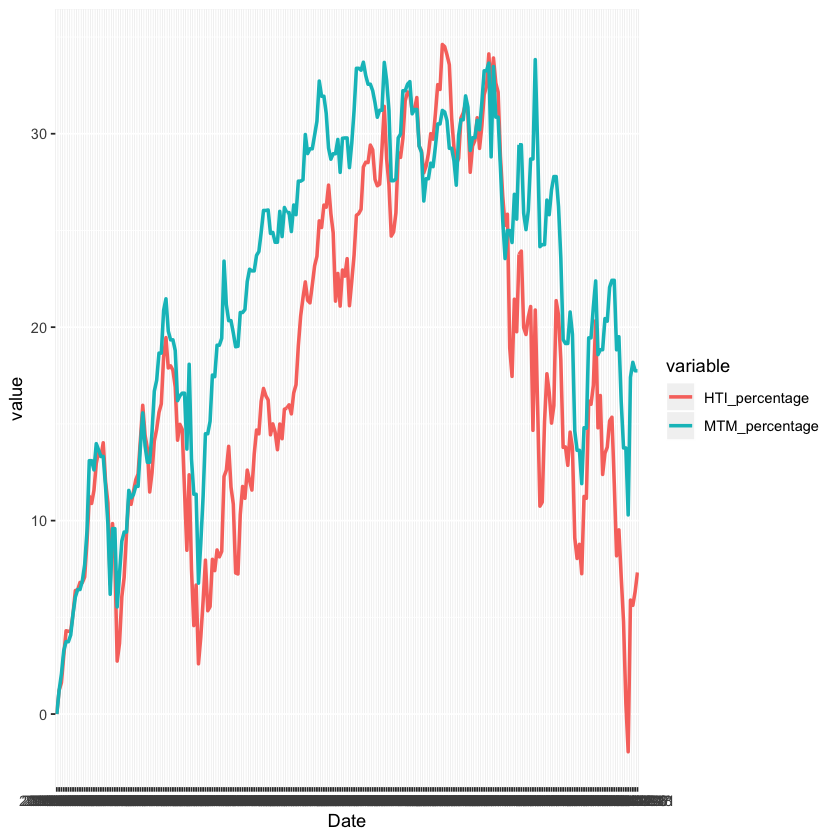

In [113]:
data.frame(Date = row.names(universe), HTI_percentage = portfolio_low_with_dividend['HTI_percentage'] , MTM_percentage=portfolio_low_with_dividend['MTM_percentage']) %>%
reshape2::melt(id.vars="Date") %>%
ggplot(aes(x=Date, y=value, group=variable, color=variable)) + geom_line(size=1)

8. Download the USD/JPY 2018 historical data at https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.


In [114]:
dollar_to_yen_df <- read.csv(file="myDollarToYen.csv",row.names="X")
rownames(dollar_to_yen_df) <- 1:nrow(dollar_to_yen_df)

In [115]:
portfolio_low_with_dividend['Date']= row.names(portfolio_low_with_dividend)
temp <- merge(x = select(portfolio_low_with_dividend, c('MTM','Date')), y = dollar_to_yen_df, by = "Date" , all.x = TRUE)


In [116]:
multiply= function(x, y){ x * y}

temp$MTM_jpy= mapply(multiply, temp$MTM, temp$Dollar.Yen)

temp$jpy_perc_change= ((temp$MTM_jpy - temp$MTM_jpy[1]) / temp$MTM_jpy[1]) * 100
head(temp)

Date,MTM,Dollar.Yen,MTM_jpy,jpy_perc_change
2018-01-02,5000000,112.29,561450000,0.000000
2018-01-03,5061134,112.51,569428202,1.421000
2018-01-04,5103637,112.75,575435095,2.490889
2018-01-05,5164049,113.05,583795707,3.980000
2018-01-08,5187004,113.09,586598250,4.479161
2018-01-09,5187004,112.65,584315969,4.072663


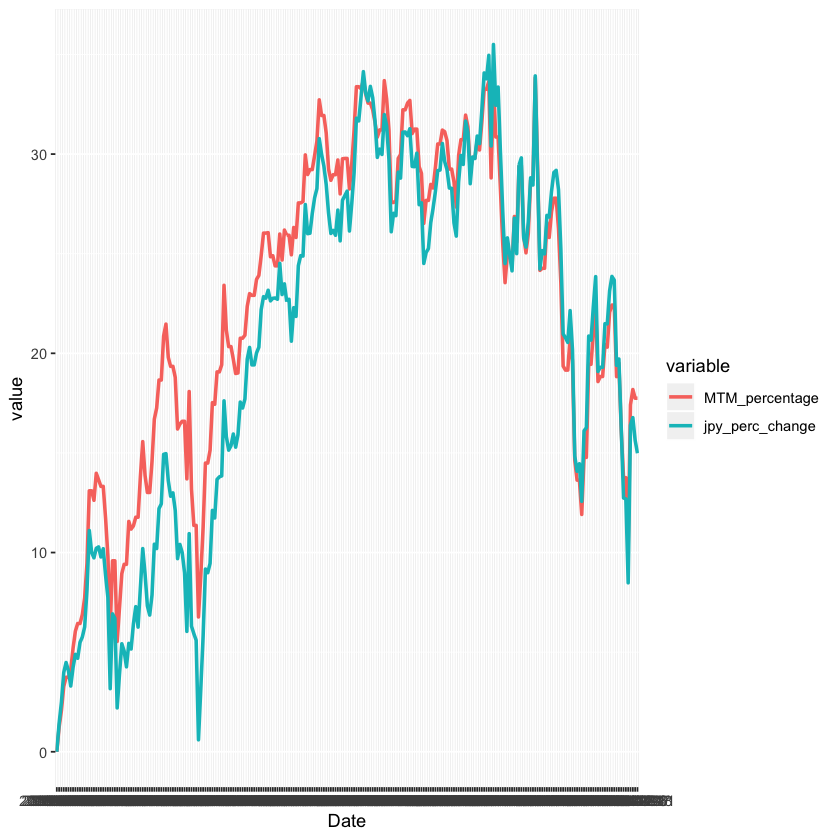

In [117]:
#plotting the graph for daily percentage change in MTM value in dollars and MTM value in yen.

temp2_df= data.frame(Date= temp['Date'], MTM_usd= portfolio_low_with_dividend['MTM_percentage'], MTM_jpy= temp['jpy_perc_change'])

temp2_df= reshape2::melt(temp2_df, id.vars= "Date")

ggplot(temp2_df, aes(x= Date, y= value, group= variable, color= variable)) + geom_line(size= 1)


9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018. 

In [118]:
MTM_value_for_a_date<- function(date,days){
    temp<-rebalancing(days,1,5000000,'low')
    return(temp[date,'MTM'])
}
MTM_value <- vector(mode="list")
for (i in 1:31){
    MTM_value[[i]]=MTM_value_for_a_date('2018-12-31',i) 
}

In [119]:
final_value <- t(as.data.frame(MTM_value))
rownames(final_value) <- 1:nrow(final_value)
final_value<-data.frame(final_value)
final_value['Days']<-row.names(final_value)
colnames(final_value)[1] <- "MTM"
colnames(final_value)[2] <- "Days"

In [120]:
head(arrange(final_value,desc(MTM)),n=5)

MTM,Days
5887309,5
5884403,2
5688548,26
5640954,13
5613483,25


The optimal number of days is 5